## Observations and Insights 

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.columns
#Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
study_results.columns
#Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

# Combine the data into a single dataset
mouse_study_results=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_results.head()
#mouse_study_results= mouse_study_results.loc[mouse_study_results.duplicated(subset=[“Mouse ID”,“Timepoint”]), “Mouse ID”].unique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice.
mouse_study_results["Mouse ID"].value_counts()

g989    13
i738    10
b879    10
h246    10
o331    10
        ..
t573     1
u153     1
v199     1
x336     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ids=mouse_study_results.loc[mouse_study_results.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

print(dup_mouse_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse_study_data = mouse_study_results[mouse_study_results['Mouse ID'].isin(dup_mouse_ids)==False]
clean_study_data=mouse_study_results[mouse_study_results["Mouse ID"].isin(dup_mouse_ids)==False]

clean_study_data.head(100)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [73]:
# Checking the number of mice in the clean DataFrame.
clean_study_data["Mouse ID"].value_counts()

i738    10
b128    10
h246    10
o331    10
s565    10
        ..
v199     1
b447     1
f932     1
u153     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [98]:
#Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
 #      'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
   #   dtype='object')# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen=clean_study_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_regimen=clean_study_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_regimen=clean_study_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_regimen=clean_study_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_regimen=clean_study_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_summary= pd.DataFrame({"Mean Tumor Volume": mean_regimen,
                               "Median Tumor Volume": median_regimen,
                               "Variance Tumor Volume": var_regimen,
                               "STD Drug Tumor Volume": std_regimen,
                               "SEM Drug Tumor Volume": sem_regimen})
# Assemble the resulting series into a single summary dataframe.
regimen_summary.head()


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Drug Tumor Volume,SEM Drug Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (1).

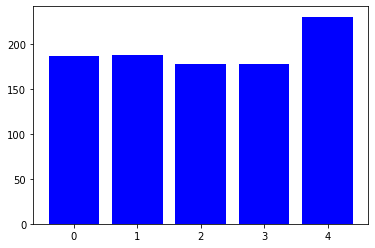

In [125]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_drug_regimen=clean_study_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug_regimen.head()
#Drug Regimen
#Capomulin    230
#Ceftamin     178
#Infubinol    178
#Ketapril     188
#Naftisol     186
drug_regimen= ["Naftisol", "Ketapril", "Infubinol", "Ceftamin", "Capomulin"]
unique_mice_tested= [186,188,178,178,230]
x_axis= np.arange(len(unique_mice_tested))
plt.bar(x_axis, unique_mice_tested, color ="b", align="center")
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, [drug_regimen])

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
